# DS Challenge

## Exercise 1

In [2]:
!bzcat data/bookings.csv.bz2 | head -n 10000 >> data/bookings.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = data/bookings.csv.bz2, output file = (stdout)


In [1]:
import bz2

def count_lines(file_path):
    count = 0
    with bz2.BZ2File(file_path, 'r') as file:
        for line in file:
            count += 1
    return count

In [2]:
%%time
count_lines('data/bookings.csv.bz2')

CPU times: user 2min 35s, sys: 426 ms, total: 2min 35s
Wall time: 2min 36s


10000011

In [3]:
%%time
count_lines('data/searches.csv.bz2')

CPU times: user 2min 27s, sys: 356 ms, total: 2min 27s
Wall time: 2min 27s


20390199

## Exercise 2

In [1]:
import pandas as pd
chunksize = 1000
bookings = pd.read_csv('data/bookings.csv.bz2', sep='^', chunksize=chunksize)

In [7]:
df = bookings.read(10000)

In [10]:
df.shape

(10000, 38)

In [40]:
pax_by_airport = df.groupby('arr_port')['pax'].sum()

In [8]:
pax_by_airport.sort_values(ascending=False).head(10)

arr_port
DCA         50
JFK         14
FLL         13
PVG         13
SVO         12
LGA         12
CGK         12
MIA         11
LAS         11
BOS         11
Name: pax, dtype: int64

In [17]:
df.columns = df.columns.str.strip()

In [95]:
def top10_arr_airports_2013(bookings_filepath, chunksize=1e7):
    bookings = pd.read_csv(bookings_filepath, sep='^', usecols=['pax','arr_port', 'year'], chunksize=chunksize)
    total_pax_by_airport = pd.Series([],dtype=int)
    for chunk in bookings:
        year_2013 = chunk[chunk['year'] == 2013]
        pax_by_airport = year_2013.groupby('arr_port')['pax'].sum()
        total_pax_by_airport = total_pax_by_airport.add(pax_by_airport, fill_value=0)
    return total_pax_by_airport.sort_values(ascending=False).head(10)

In [97]:
%%time
top10_arr_airports = top10_arr_airports_2013('data/bookings.csv.bz2')

CPU times: user 2min 57s, sys: 983 ms, total: 2min 58s
Wall time: 2min 58s


In [100]:
#top10_arr_airports.to_csv('output/top10_arr_airports.csv')

In [53]:
# Strip spaces in col. names
df.columns = [col.strip() for col in df.columns]

In [52]:
df.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

## Exercise 3

In [1]:
import pandas as pd
chunksize=1000
searches = pd.read_csv('data/searches.csv.bz2', sep='^', chunksize=chunksize)

In [173]:
sample = searches.read(10000)

In [174]:
sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
20000,2013-01-21,22:58:48,MPT,657f25ccd0a4120f111ff0014bd1816f,NO,OSL,DPS,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
20001,2013-01-21,19:35:21,MPT,03ffd9c855fe9e61b8d3dc05758967ab,CA,YYZ,BKK,1,2,YYZ,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,YTO
20002,2013-01-21,17:20:50,FCP,7da60d9e60a322d3fff7e00cb62baa53,BR,BEL,SAO,0,1,BEL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SAO
20003,2013-01-21,14:33:27,FQD,e917152f2688581ec4c0f40d36439a4d,NO,LAX,AMS,1,2,LAX,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,022e890a5a4b5e04ffd528027dd22de7,OSL
20004,2013-01-21,07:28:19,MPT,2b197e7490ac46000272c9550dc6de3f,CZ,LHR,TNR,0,2,LHR,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PRG


In [175]:
sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [176]:
sample['Destination']

20000    DPS
20001    BKK
20002    SAO
20003    AMS
20004    TNR
        ... 
29995    BLR
29996    PMI
29997    BOG
29998    PAR
29999    OSL
Name: Destination, Length: 10000, dtype: object

In [177]:
cities = ['MAD', 'AGP', 'BCN']

In [178]:
sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [179]:
sample['Date'] = pd.to_datetime(sample['Date'])

In [180]:
sample['Month'] = sample['Date'].dt.month

In [ ]:
cities = sample['']

In [89]:
sample['Date'].apply(lambda x: x.split('-')[1])

10000    01
10001    01
10002    01
10003    01
10004    01
         ..
19995    01
19996    01
19997    01
19998    01
19999    01
Name: Date, Length: 10000, dtype: object

In [194]:
by_month = sample.groupby(['Destination', 'Month'])['Date'].count().reset_index()

In [195]:
by_month

,Destination,Month,Date
0,AAE,1,1
1,AAL,1,2
2,AAQ,1,3
3,AAR,1,1
4,ABA,1,1
...,...,...,...
1053,ZNA,1,1
1054,ZNZ,1,1
1055,ZRH,1,46
1056,ZTH,1,1


In [196]:
total = pd.DataFrame(columns=['Destination', 'Month','Date'])
total

,Destination,Month,Date


In [200]:
total.merge(by_month, how='outer').groupby(['Destination', 'Month'])['Date'].sum()

Destination  Month
AAE          1         1
AAL          1         2
AAQ          1         3
AAR          1         1
ABA          1         1
                      ..
ZNA          1         1
ZNZ          1         1
ZRH          1        46
ZTH          1         1
ZWS          1         1
Name: Date, Length: 1058, dtype: int64

In [211]:
def monthly_searches(searches_filepath, chunksize=1e7):
    searches = pd.read_csv(searches_filepath, sep='^', usecols=['Date', 'Destination'], chunksize=chunksize)
    total = pd.DataFrame(columns=['Destination', 'Month', 'Date'])
    for chunk in searches:
        chunk['Month'] = chunk['Date'].apply(lambda x: x.split('-')[1])
        by_month = chunk.groupby(['Destination', 'Month'])['Date'].count().reset_index()
        total = total.merge(by_month, how='outer')
    total = total.groupby(['Destination', 'Month'])['Date'].sum()
    total.columns = 'Searches'
    return total

In [204]:
%%time
monthly_searches_by_city = monthly_searches('data/searches.csv.bz2')
monthly_searches_by_city

CPU times: user 2min 46s, sys: 1.6 s, total: 2min 48s
Wall time: 2min 48s


Destination  Month
AAC          04        29
AAE          01        29
             02        58
             03       145
             04        87
                     ... 
ZYR          08        58
             09        57
             10       113
             11        56
ZYZ          08        29
Name: Date, Length: 19009, dtype: int64

In [210]:
monthly_searches_by_city.to_csv('output/monthy_searches_by_city.csv')

In [215]:
#madrid.to_csv('output/madrid.csv')
#malaga.to_csv('output/malaga.csv')
#barcelona.to_csv('output/barcelona.csv')

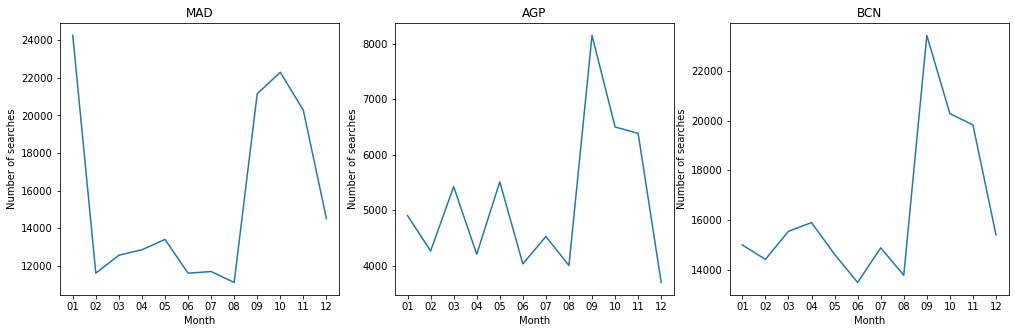

In [216]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(17,5))
cities = ['MAD', 'AGP', 'BCN']
for idx, city in enumerate(cities):
    searches_city = monthly_searches_by_city.loc[city]
    ax[idx].plot(searches_city) 
    ax[idx].set_title(city)
    ax[idx].set_xlabel('Month')
    ax[idx].set_ylabel('Number of searches');

## Exercise 4